In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.preprocessing import image

In [24]:
image_data=[]
labels=[]
pokemon_to_label={"Bulbasaur":0,"Meowth":1,"Pikachu":2}
label_to_pokemon={0:"Bulbasaur",1:"Meowth",2:"Pikachu"}

p=Path("./pokemon_dataset/")
for folders in p.glob("*"):
    label=str(folders).split("\\")[-1]
    cnt=0
    for images in folders.glob("*.jpg"):
        img=image.load_img(images,target_size=(40,40))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(pokemon_to_label[label])
        cnt+=1
    print("label: "+label+str(cnt))
        
        
        

label: Bulbasaur173
label: Meowth70
label: Pikachu199


In [25]:
def softmax(y):
    a=np.exp(y)
    b=a/np.sum(a,axis=1,keepdims=True)
    return b

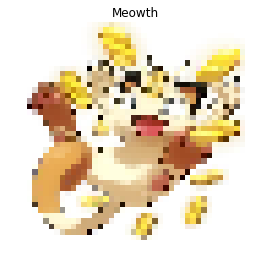

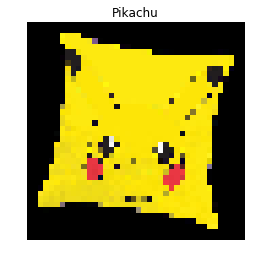

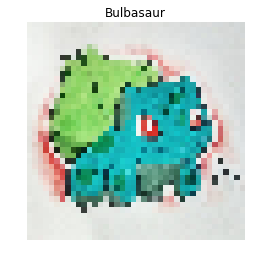

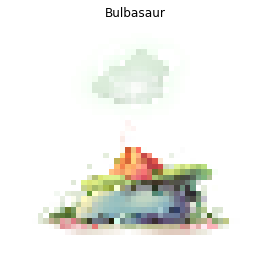

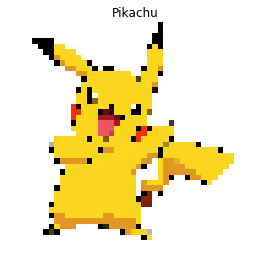

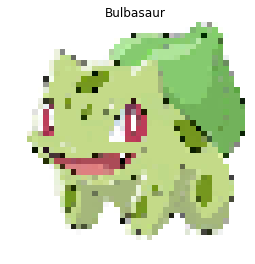

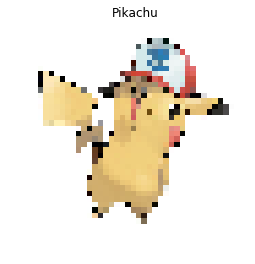

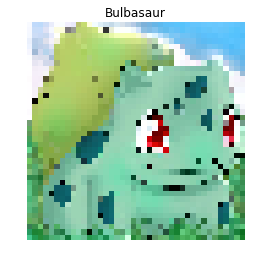

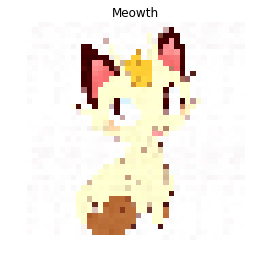

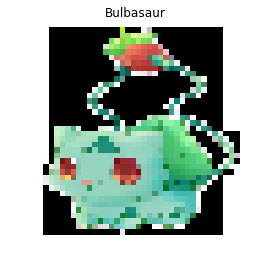

In [26]:
from sklearn.utils import shuffle
X=np.array(image_data)
Y=np.array(labels)
X,Y=shuffle(X,Y,random_state=2)

X=X/255
import matplotlib.pyplot as plt
for i in range(10):
    plt.title(label_to_pokemon[Y[i]])
    plt.imshow(X[i])
    plt.axis("off")
    plt.show()
split=int(len(X)*0.8)
x_train=X[:split]
y_train=Y[:split]
x_test=X[split:]
y_test=Y[split:]
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

In [27]:
def onehotvector(y,depth):
    m=y.shape[0]
    y=y.reshape(-1,)
    a=np.zeros((m,depth))
    a[np.arange(m),y]=1
    return a
    
    
    

In [28]:
def loss(y_cap,y_ohv):
   
    return(-np.mean(y_ohv*np.log(y_cap)))      

In [35]:
class neural_model:
    def __init__(self,layers,input_size,output_size):
        np.random.seed(0)
        model={}
        model["w1"]=np.random.randn(input_size,layers[0])
        model["w2"]=np.random.randn(layers[0],layers[1])
        model["w3"]=np.random.randn(layers[1],output_size)
        
        model["b1"]=np.zeros((1,layers[0]))
        model["b2"]=np.zeros((1,layers[1]))
        model["b3"]=np.zeros((1,output_size))
        self.model=model    
    
    def forward(self,x):
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_cap=softmax(z3)
        
        self.model["activation_op"]=(a1,a2,y_cap)
        return y_cap
        
    def backward(self,X,Y,n):
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        a1,a2,y_cap=self.model["activation_op"]
        
        delta3=y_cap-Y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*(np.dot(delta3,w3.T))
        db2=np.sum(delta2,axis=0)
        dw2=np.dot(a1.T,delta2)
        
        delta1=(1-np.square(a1))*(np.dot(delta2,w2.T))
        db1=np.sum(delta1,axis=0)
        dw1=np.dot(X.T,delta1)
        
        self.model["w1"]-=n*dw1
        self.model["w2"]-=n*dw2
        self.model["w3"]-=n*dw3
        
        self.model["b1"]-=n*db1
        self.model["b2"]-=n*db2
        self.model["b3"]-=n*db3

    
    def train(self,itr,X,Y,n):
        depth=len(np.unique(Y))

        y_ohv=onehotvector(Y,depth)
        losses=[]
        cap=[]
    
        for i in range(itr):
            y_cap=self.forward(X)
            
            l=loss(y_cap,y_ohv)        
            losses.append(l)
            self.backward(X,y_ohv,n)
            
        return losses,y_cap
            
    
        
        
        
    
    

In [60]:
modelnew=neural_model([100,50],4800,3)
l,y_cap=modelnew.train(500,x_train,y_train,0.0002)

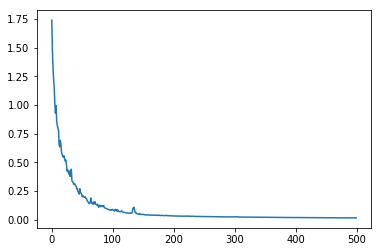

In [61]:
plt.plot(l)

In [62]:
def get_accuracy(y,y_pred):
    return((np.sum(y==y_pred)/len(y))*100)
    
    

In [64]:
def predict(y_cap):
    return(np.argmax(y_cap,axis=1))
    

In [65]:
y_cap=predict(y_cap)

In [67]:
get_accuracy(y_train,y_cap)

99.43342776203966

In [69]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

# Test

In [70]:
y_pred=modelnew.forward(x_test)
y_cap=predict(y_pred)
get_accuracy(y_test,y_cap)

64.04494382022472

Confusion matrix, without normalization
[[30  3  8]
 [ 3  5  8]
 [ 8  2 22]]


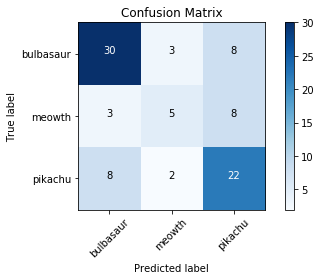

In [74]:
matrix=confusion_matrix(y_cap,y_test)
plot_confusion_matrix(matrix,classes=["bulbasaur","meowth","pikachu"],title="Confusion Matrix")